In [26]:
!pip install plotnine
!conda install -c conda-forge --yes plotnine

     ---------------------------------------- 1.3/1.3 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 74.0/74.0 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ianli\anaconda3

  added / updated specs:
    - plotnine


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.zoneinfo-0.2.1   |  py310h5588dad_7           6 KB  conda-forge
    boltons-23.0.0             |     pyhd8ed1ab_0         296 KB  conda-forge
    ca-certificates-2023.5.7   |       h56e8100_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         

In [2]:
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualizationdd
from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, facet_grid, labs, geom_point, geom_col, stat_count, geom_histogram, stat_density, coord_flip

In [3]:
gym = pd.read_csv("https://raw.githubusercontent.com/FoxuF/DataSetsMachineLearning/main/DataSets/Inscritos_Gimnasio.csv", encoding= 'unicode_escape')

In [4]:
gym.head()

,Plan,Edad,Sexo,Educaci¢n,Estado_civil,Uso,Estado,Salario,Kilometros
0,TM195,19.0,Mujer,14,Casado,4.0,3,30699.0,66.0
1,TM195,20.0,Mujer,14,Casado,3.0,3,32973.0,66.0
2,TM195,21.0,Mujer,14,Casado,3.0,3,35247.0,75.0
3,TM195,21.0,Mujer,15,Casado,2.0,3,37521.0,85.0
4,TM195,22.0,Mujer,14,Casado,3.0,2,35247.0,66.0


In [5]:
gym.tail()

,Plan,Edad,Sexo,Educaci¢n,Estado_civil,Uso,Estado,Salario,Kilometros
175,TM798,29.0,Hombre,18,Soltero,5.0,5,52290.0,180.0
176,TM798,34.0,Hombre,16,Soltero,5.0,5,92131.0,150.0
177,TM798,40.0,Hombre,21,Soltero,6.0,5,83416.0,200.0
178,TM798,42.0,Hombre,18,Soltero,5.0,4,89641.0,200.0
179,TM798,45.0,Hombre,16,Soltero,5.0,5,90886.0,160.0


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Análisis de datos y depuración
    
    
1. Verifique las dimensiones del marco de datos en términos de filas y columnas
2. Verifique los tipos de datos. Asegúrese de que sus tipos de datos sean correctos. Referir definiciones de datos para validar
3. Si los tipos de datos no se ajustan a la definición comercial, cambie los tipos de datos según el requisito
4. Estadísticas resumidas del estudio
5. Comprueba los valores que faltan
6. Correlación del estudio
7. Detectar valores atípicos

Nota: es un arte explorar datos y se necesitará más y más práctica para adquirir experiencia en esta área.  

# Datos 
Los datos son registros sobre clientes de un gimnasio, el conjunto de datos contiene la edad, el genero, el estado civil, el uso y los kilometros, salario y demas del cliente, al igual que el plan que contrato.
Ya que el conjunto de datos cuenta con pocos registros nulos se descartaran completamente en vez de reemplazar por la moda ya que a mi consideracion no afectara el analisis que se realice. 

Las variables importantes en mi opinion como dueño del gym, serian las edades, el genero, el uso y el plan. Descartaria las demas. Se podria dar uso a salario y quiza estado pero no estoy seguro de lo que represente la columna estado asi que no la tocare.

Estas variables me son importantes ya que puedo hacerme las siguientes preguntas 
¿Que plan es el mas comprado?
¿Que genero viene o usa mas el gym?
¿Que plan prefiere los hombres y que plan las mujeres?
¿Cual es la edad promedio que viene a mi gym?
Todo con el objetivo de mejorar mi servicio y ver cuales son mi publico objetivo

In [6]:
gym.shape

(180, 9)

In [7]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Plan          179 non-null    object 
 1   Edad          177 non-null    float64
 2   Sexo          178 non-null    object 
 3   Educaci¢n     180 non-null    int64  
 4   Estado_civil  179 non-null    object 
 5   Uso           179 non-null    float64
 6   Estado        180 non-null    int64  
 7   Salario       178 non-null    float64
 8   Kilometros    178 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.8+ KB


In [8]:
gym.dtypes

Plan             object
Edad            float64
Sexo             object
Educaci¢n         int64
Estado_civil     object
Uso             float64
Estado            int64
Salario         float64
Kilometros      float64
dtype: object

In [9]:
gym.describe()

,Edad,Educaci¢n,Uso,Estado,Salario,Kilometros
count,177.000000,180.000000,179.000000,180.000000,178.000000,178.000000
mean,28.819209,15.572222,3.458101,3.311111,53448.191011,102.932584
std,6.995215,1.617055,1.087301,0.958869,16150.024356,52.036341
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,43490.250000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50028.000000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58383.750000,113.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [35]:
gym.describe(include=object)

,Plan,Sexo,Estado_civil
count,179,178,179
unique,3,2,2
top,TM195,Hombre,Casado
freq,80,103,107


In [10]:
gym.isnull().sum()

Plan            1
Edad            3
Sexo            2
Educaci¢n       0
Estado_civil    1
Uso             1
Estado          0
Salario         2
Kilometros      2
dtype: int64

In [11]:
# Calcula matriz de correlación
corr_matrix_gym = gym.corr()

C:\Users\ianli\AppData\Local\Temp\ipykernel_18256\1869285906.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [12]:
corr_matrix_gym

,Edad,Educaci¢n,Uso,Estado,Salario,Kilometros
Edad,1.000000,0.292250,0.025777,0.067057,0.514948,0.048141
Educaci¢n,0.292250,1.000000,0.396053,0.410581,0.620831,0.303090
Uso,0.025777,0.396053,1.000000,0.668369,0.525630,0.764807
Estado,0.067057,0.410581,0.668369,1.000000,0.523038,0.785654
Salario,0.514948,0.620831,0.525630,0.523038,1.000000,0.552774
Kilometros,0.048141,0.303090,0.764807,0.785654,0.552774,1.000000


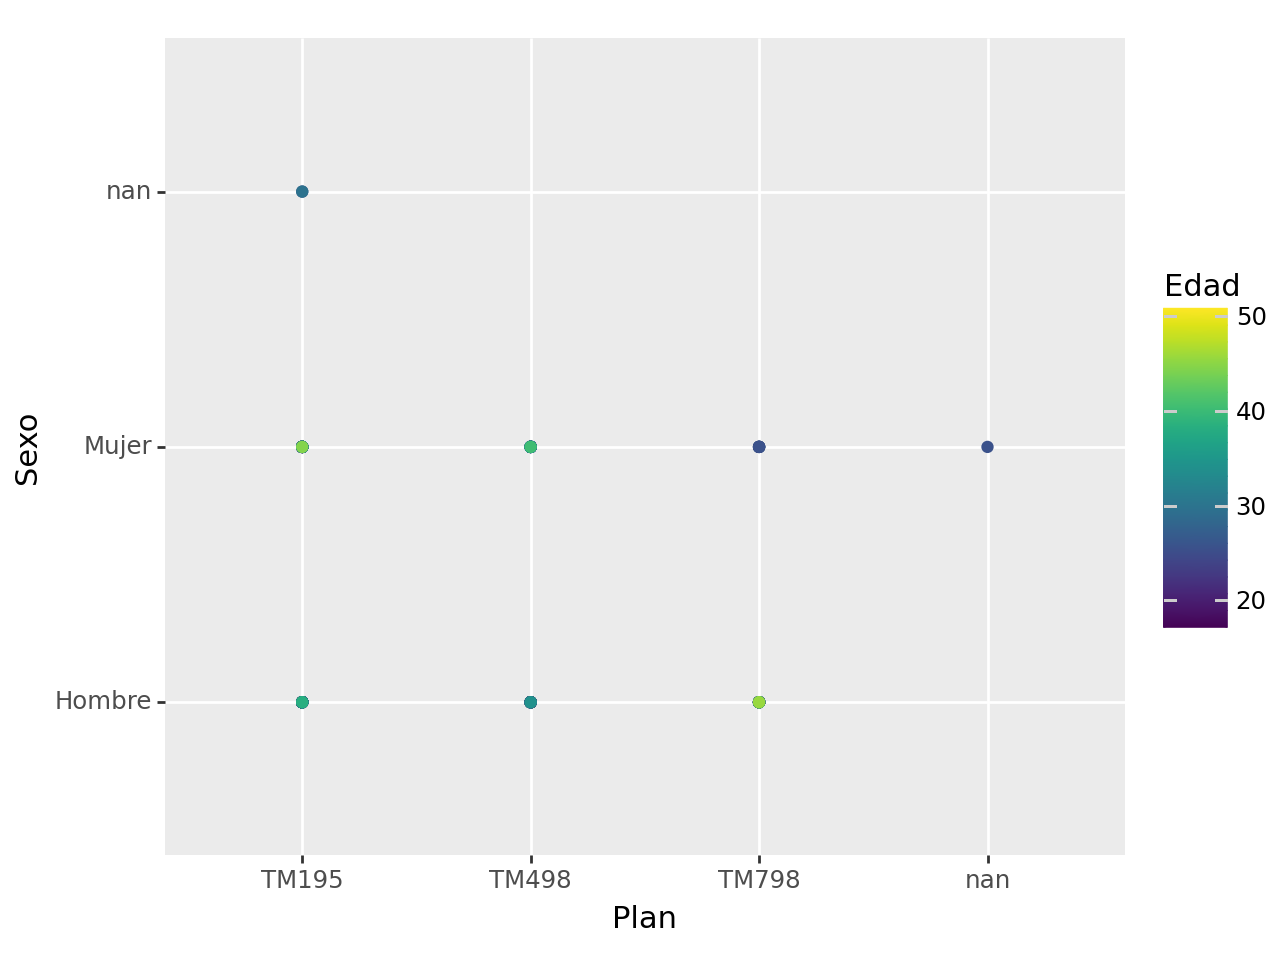

<Figure Size: (640 x 480)>

In [13]:
#Creamos nuestro canvas :) Bob Ross here i go 
ggplot(gym)
ggplot(gym) + aes(x="Plan", y="Sexo")
ggplot(gym) + aes(x="Plan", y="Sexo",color="Edad") + geom_point()


In [14]:
def missing(gym):
    print (round((gym.isnull().sum() * 100/ len(gym)),2).sort_values(ascending=False))

missing(gym)

Edad            1.67
Sexo            1.11
Salario         1.11
Kilometros      1.11
Plan            0.56
Estado_civil    0.56
Uso             0.56
Educaci¢n       0.00
Estado          0.00
dtype: float64


In [15]:
#Eliminamos registros nulos para no afectar el score de juegos con score 0. 
gymNoNaN = gym.dropna(how='any')
gymNoNaN

,Plan,Edad,Sexo,Educaci¢n,Estado_civil,Uso,Estado,Salario,Kilometros
0,TM195,19.0,Mujer,14,Casado,4.0,3,30699.0,66.0
1,TM195,20.0,Mujer,14,Casado,3.0,3,32973.0,66.0
2,TM195,21.0,Mujer,14,Casado,3.0,3,35247.0,75.0
3,TM195,21.0,Mujer,15,Casado,2.0,3,37521.0,85.0
4,TM195,22.0,Mujer,14,Casado,3.0,2,35247.0,66.0
...,...,...,...,...,...,...,...,...,...
175,TM798,29.0,Hombre,18,Soltero,5.0,5,52290.0,180.0
176,TM798,34.0,Hombre,16,Soltero,5.0,5,92131.0,150.0
177,TM798,40.0,Hombre,21,Soltero,6.0,5,83416.0,200.0
178,TM798,42.0,Hombre,18,Soltero,5.0,4,89641.0,200.0


In [16]:
gymNoNaN.isna().sum()

Plan            0
Edad            0
Sexo            0
Educaci¢n       0
Estado_civil    0
Uso             0
Estado          0
Salario         0
Kilometros      0
dtype: int64

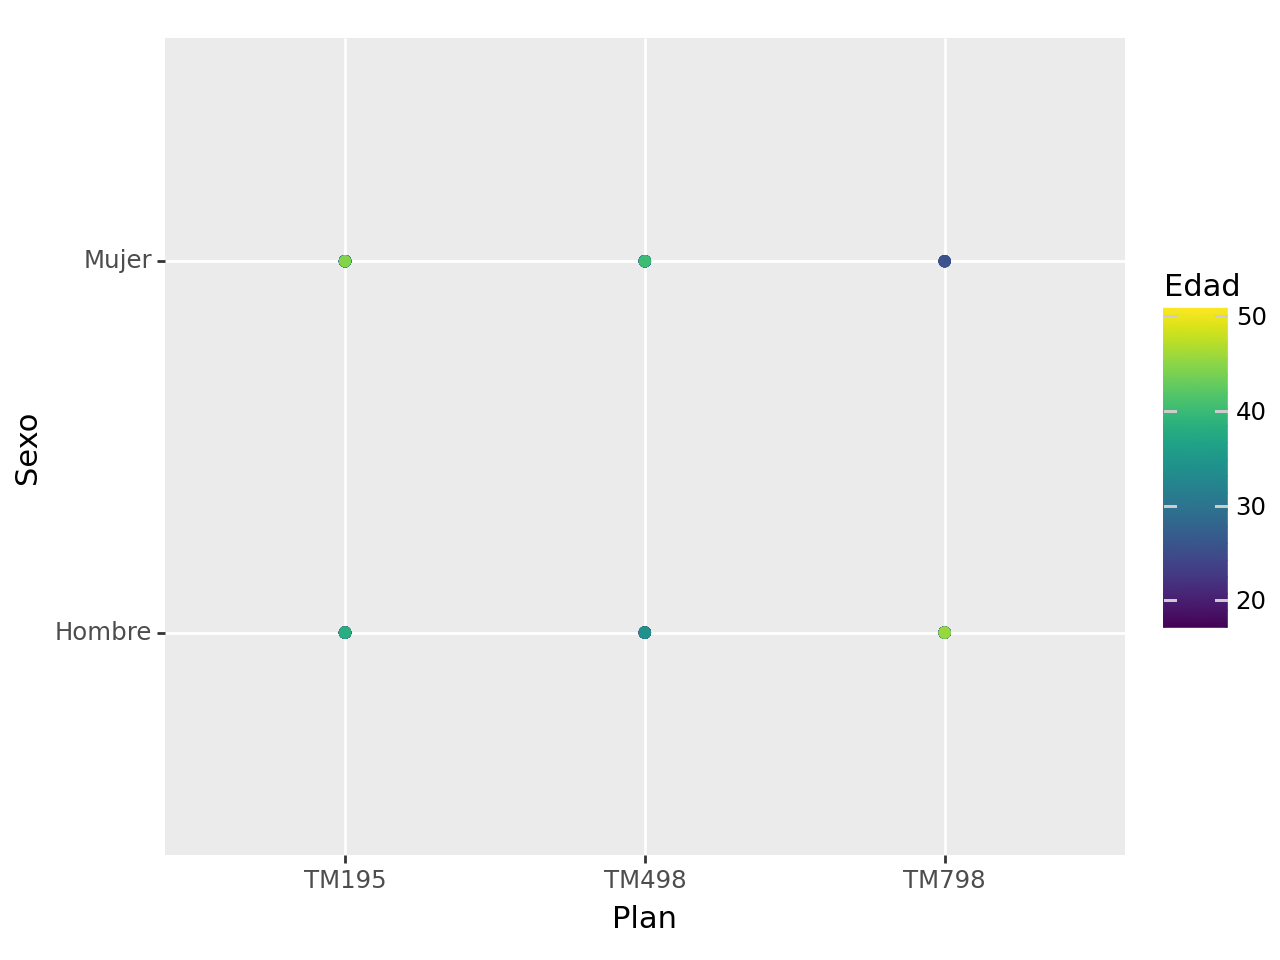

<Figure Size: (640 x 480)>

In [17]:
#Creamos nuestro canvas ahora sin nulos 
ggplot(gymNoNaN)
ggplot(gymNoNaN) + aes(x="Plan", y="Sexo")
ggplot(gymNoNaN) + aes(x="Plan", y="Sexo",color="Edad") + geom_point()

C:\Users\ianli\AppData\Local\Temp\ipykernel_18256\3157446152.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


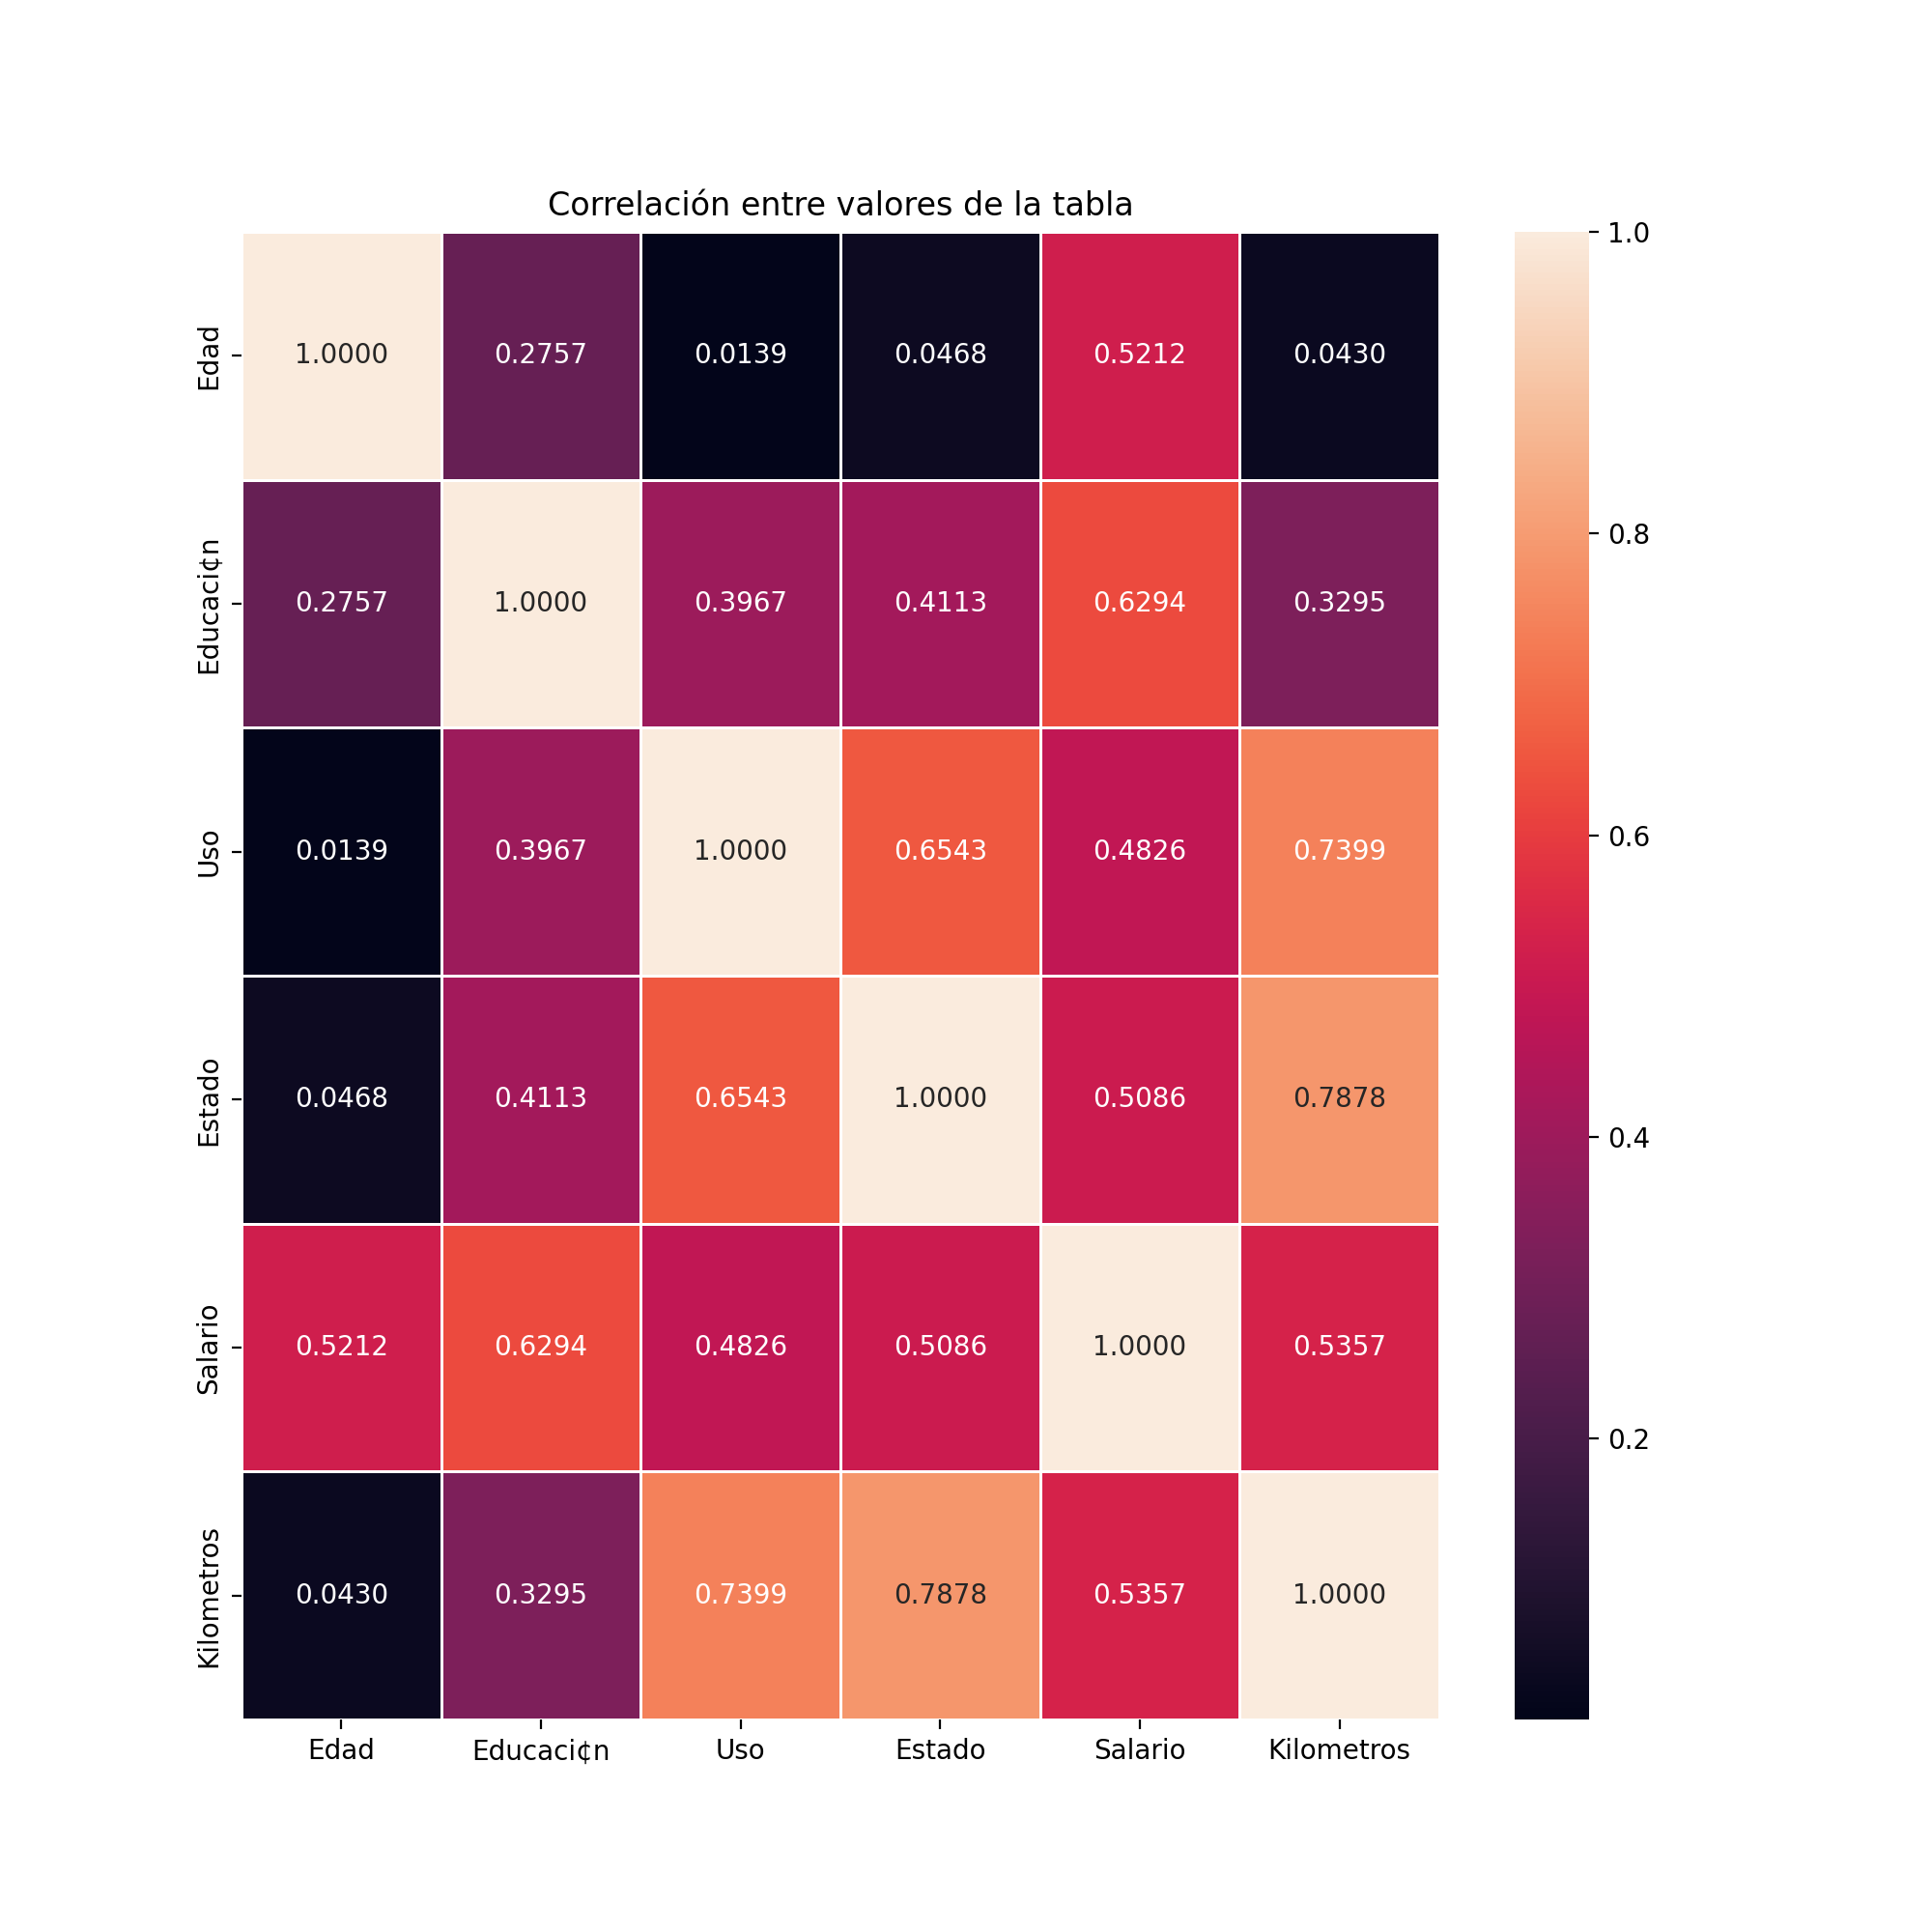

In [18]:
# Visualizando la Matriz de correlación
f,ax = plt.subplots(figsize=(10, 10))

# trazando el mapa de calor
# corr: dar la matriz de correlación
# cmap: código de color utilizado para trazar
# vmax: da el rango máximo de valores para el gráfico
# vmin: da un rango mínimo de valores para el gráfico
# annot: imprime los valores de correlación en el gráfico
# annot_kws={"size": 12}): Establece el tamaño de fuente de la anotación

sns.heatmap(gymNoNaN.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
# Colocando un título
plt.title('Correlación entre valores de la tabla')
plt.show()

In [19]:
gymNoNaN.boxplot(column='Uso', by = 'Edad')

<Axes: title={'center': 'Uso'}, xlabel='Edad'>

In [20]:
Q1 = gymNoNaN.quantile(0.25)
Q3 = gymNoNaN.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Edad              9.0
Educaci¢n         2.0
Uso               1.0
Estado            1.0
Salario       14781.0
Kilometros       47.0
dtype: float64


C:\Users\ianli\AppData\Local\Temp\ipykernel_18256\2388735980.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
C:\Users\ianli\AppData\Local\Temp\ipykernel_18256\2388735980.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [21]:
GymNoNew = gymNoNaN[~((gymNoNaN < (Q1 - 1.5 * IQR)) | (gymNoNaN > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\ianli\AppData\Local\Temp\ipykernel_18256\238804411.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


In [22]:
GymNoNew.boxplot(column='Plan',by = 'Uso')

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
gymNoNaN.info()
sns.displot(gymNoNaN.Plan)

In [ ]:
plt.figure(figsize=(14, 14))

sns.pairplot(gymNoNaN, diag_kind='kde');

In [ ]:
gymNoNaN["Edad"] = gymNoNaN.Edad/gymNoNaN.Uso
gymNoNaN.plot(kind='scatter', x='Edad', y="Uso",alpha = .8,color = 'blue',figsize= (6,6))
plt.xlabel('Edad')             
plt.ylabel("Uso")
plt.title('Scatter Plot') 
plt.show()

C:\Users\ianli\AppData\Local\Temp\ipykernel_18256\3419486638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


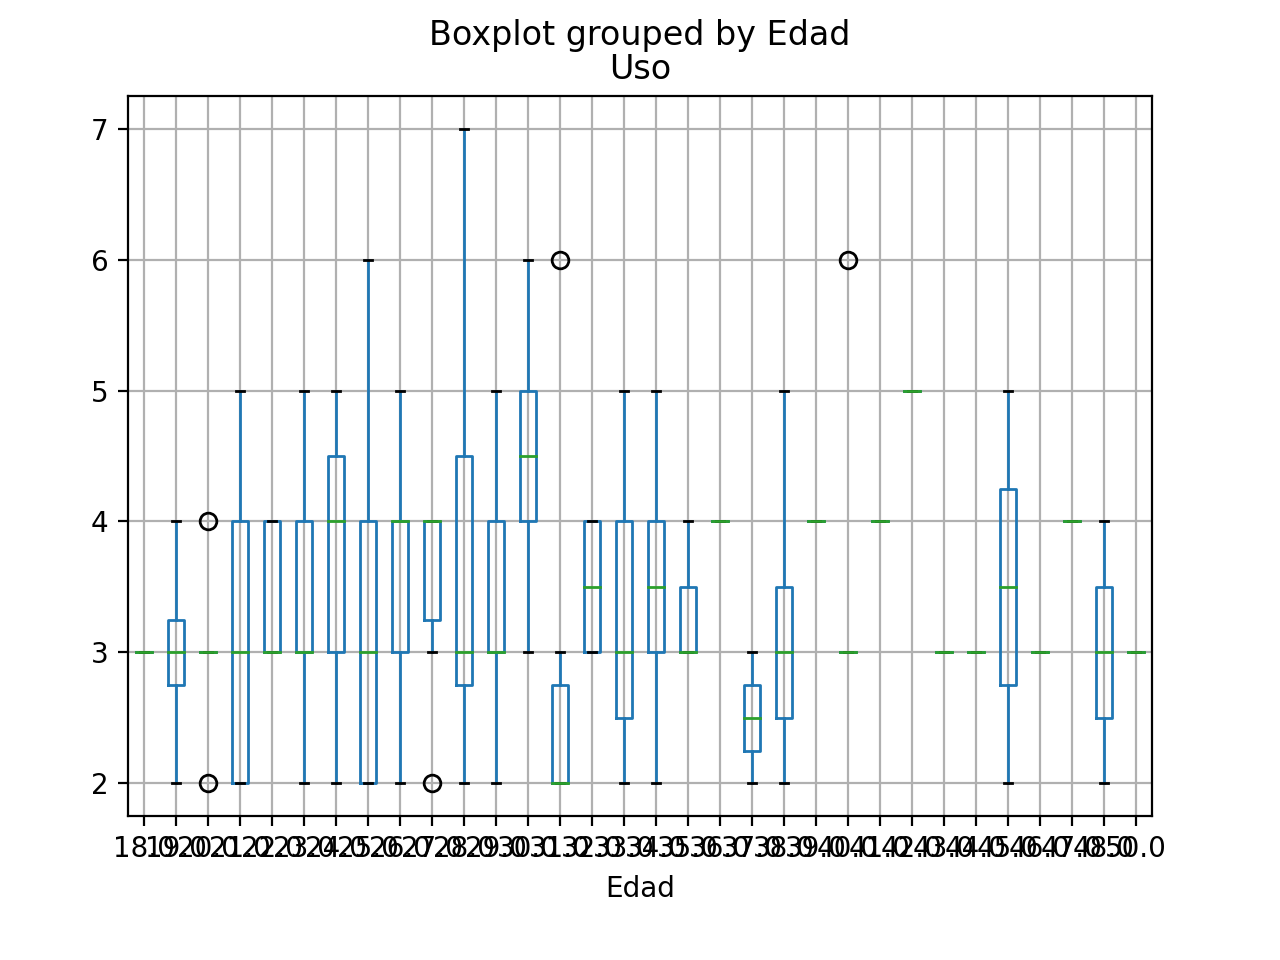

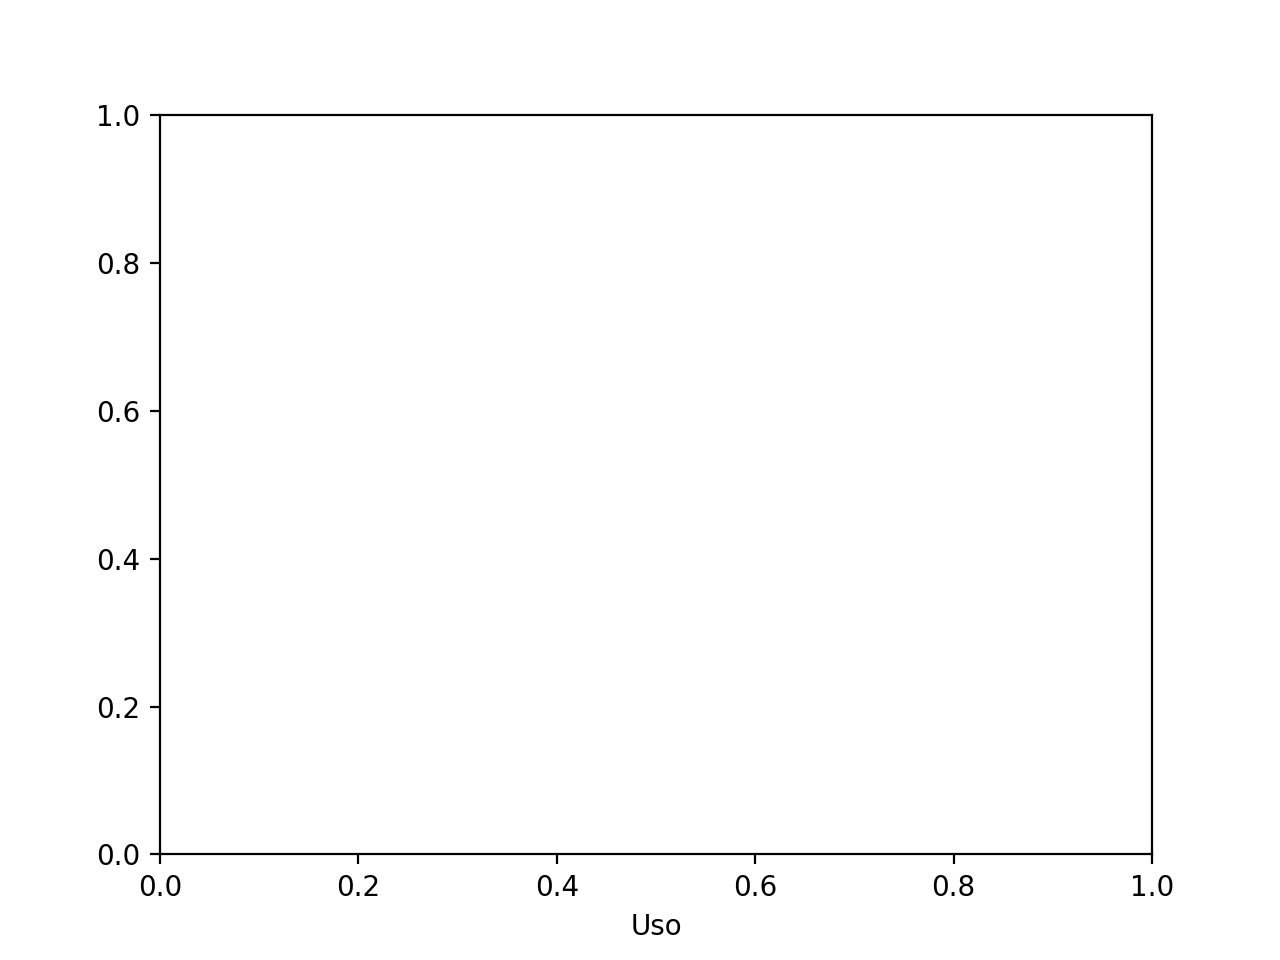

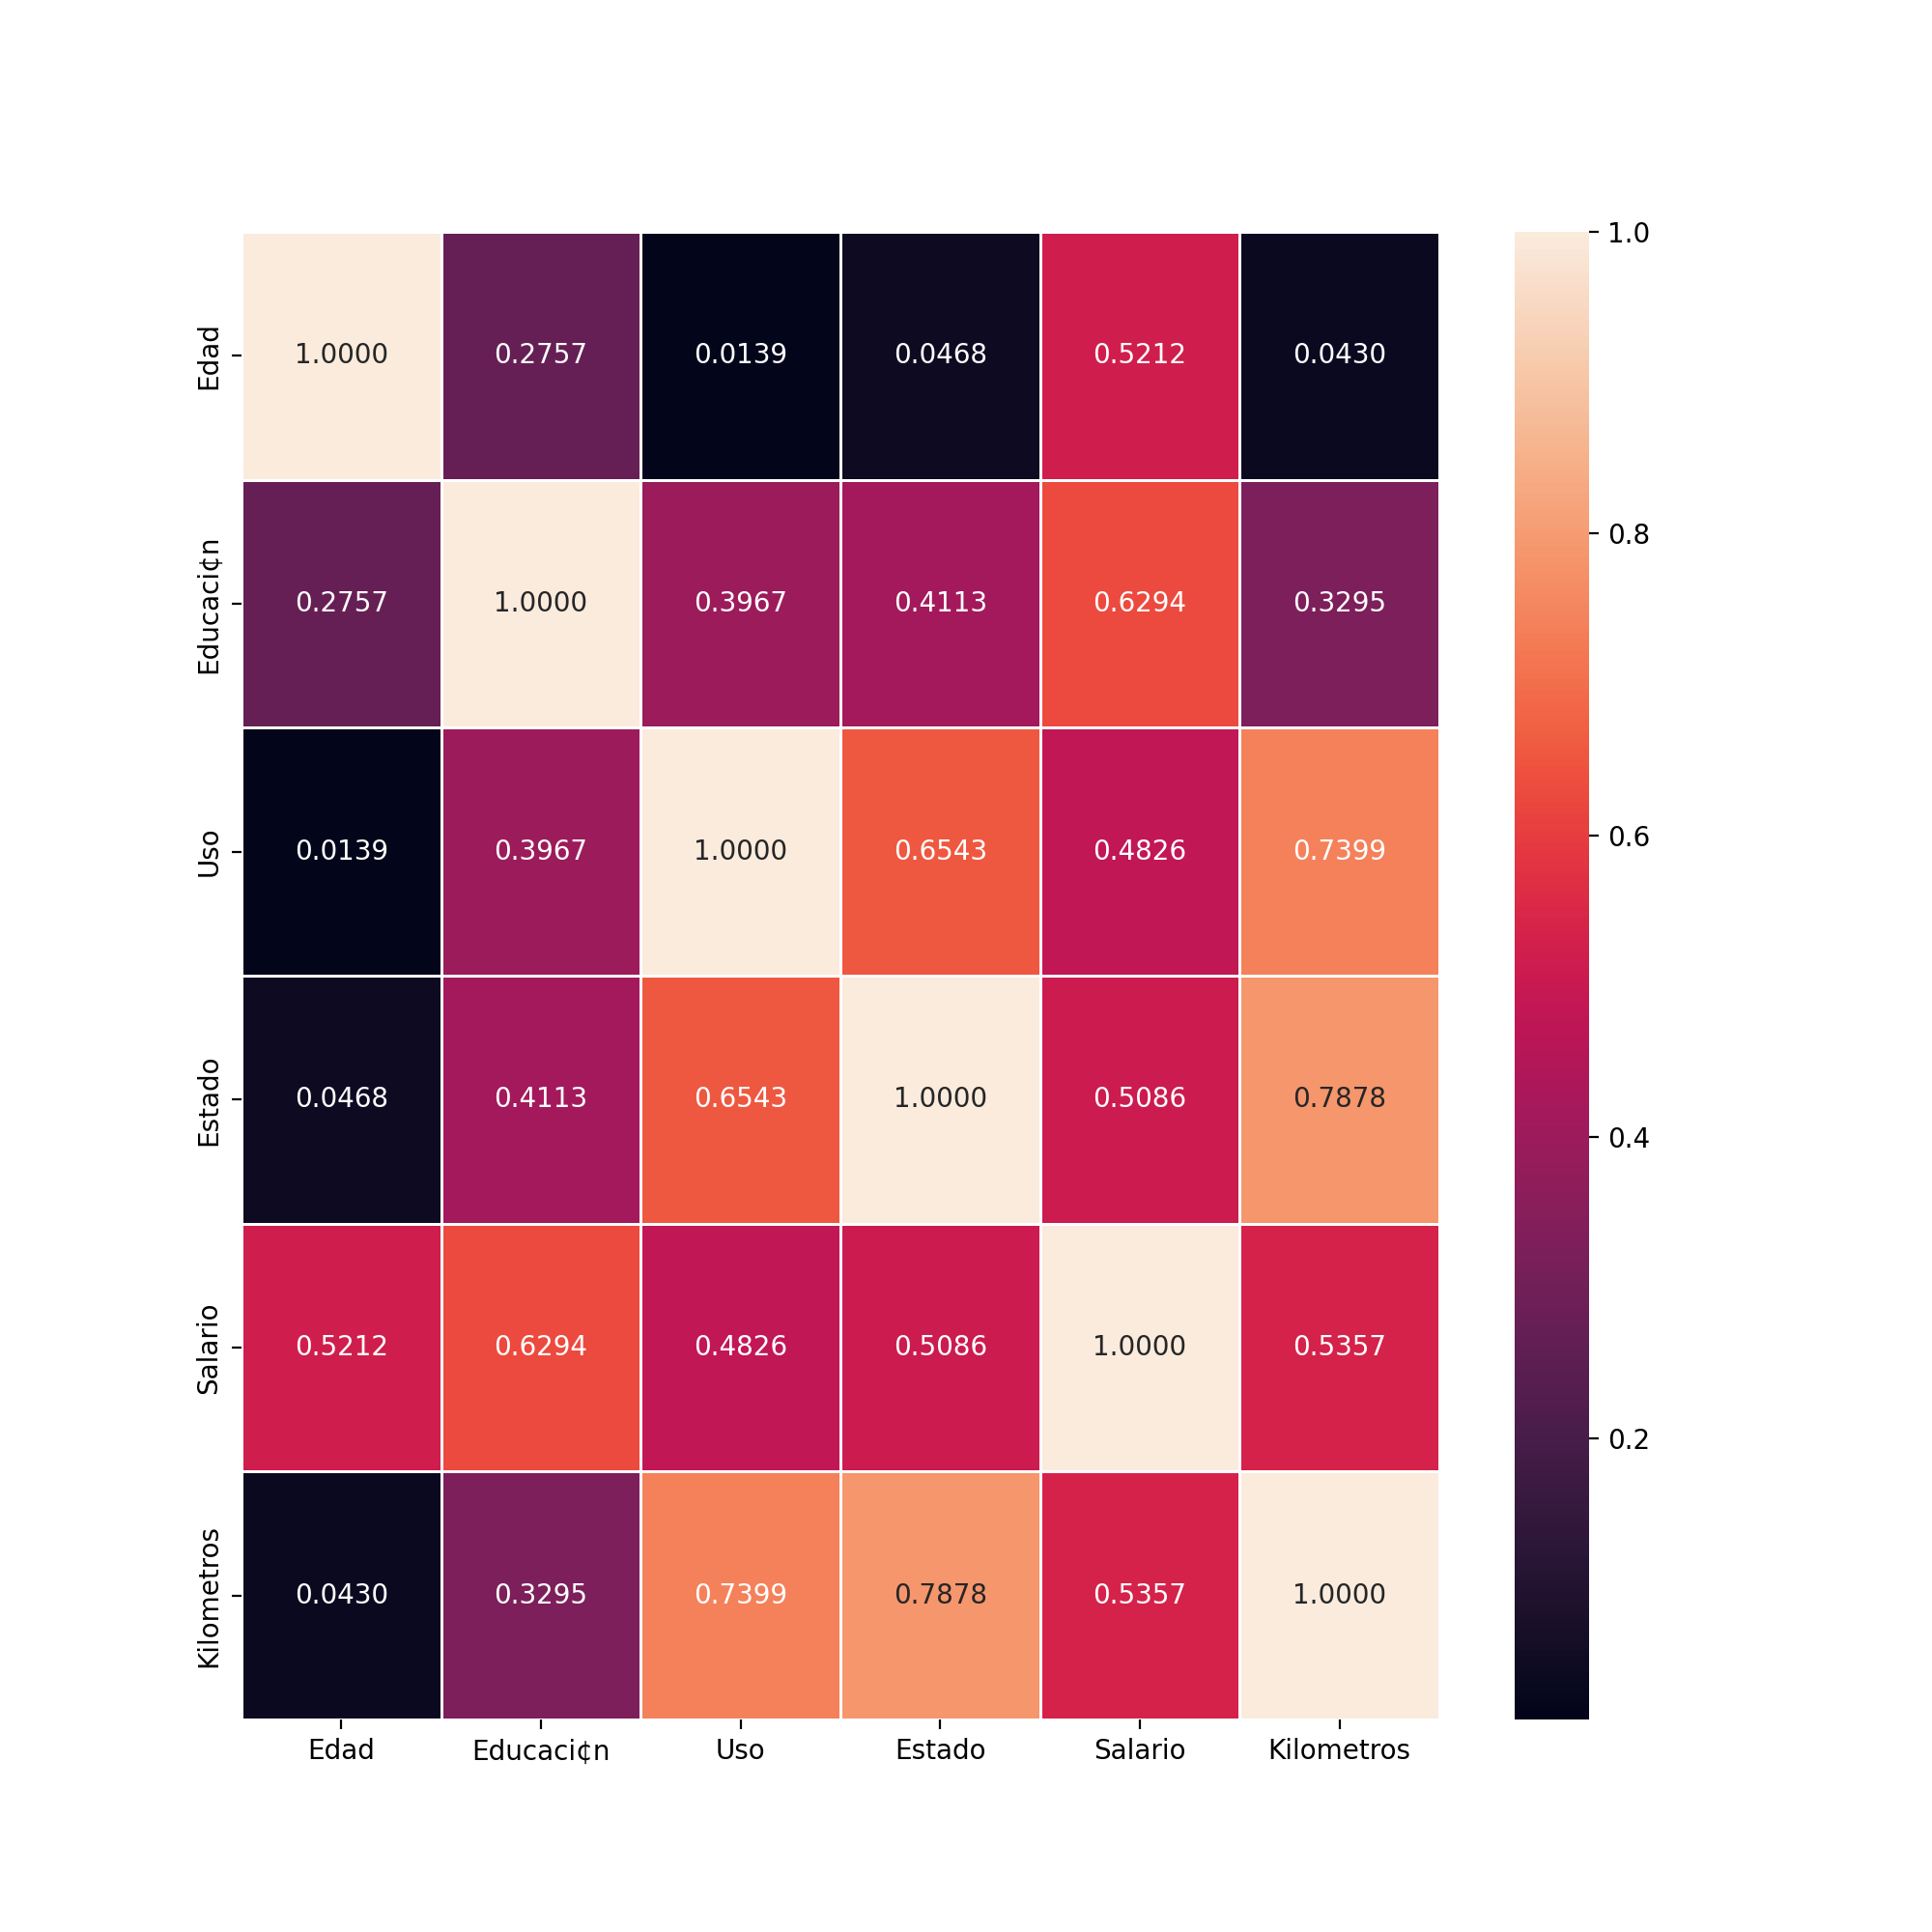

In [23]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(gymNoNaN.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
plt.show()

#### ¿Que genero usa mas mi gym?

In [32]:
#Puedo ver que mas hombres vienen a mi gym
gymNoNaN['Sexo'].value_counts()

Hombre    95
Mujer     73
Name: Sexo, dtype: int64

#### ¿Que Plan es el que compran de mi gym?

In [33]:
gymNoNaN['Plan'].nunique()

3

In [34]:
#Puedo ver que el plan TM195 es el mas comprado de mis 3 planes
gymNoNaN['Plan'].value_counts()


TM195    77
TM498    56
TM798    35
Name: Plan, dtype: int64

#### ¿Que Edad usa mas mi gym?

In [35]:
#Puedo ver que mis clientes tienden a ser de 25 a 28 años con algunas excepciones
gymNoNaN['Edad'].value_counts()

25.0    24
23.0    17
24.0    11
26.0    10
28.0     8
38.0     7
33.0     7
35.0     7
22.0     7
21.0     7
27.0     6
31.0     6
34.0     6
30.0     6
29.0     5
40.0     5
20.0     5
32.0     4
19.0     4
48.0     2
45.0     2
37.0     2
36.0     1
18.0     1
44.0     1
50.0     1
47.0     1
43.0     1
41.0     1
39.0     1
46.0     1
42.0     1
Name: Edad, dtype: int64

# Conclusion
Si quiero vender mas debo de fijarme por que estoy atrayendo a clientes hombres, que tiene de especial el plan TM195 y por que mi publico objetivo tiene al rededor de 25 a 30 años.